In [58]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
import sklearn.linear_model
from planar_utils import plot_decision_boundary, sigmoid, load_planar_dataset, load_extra_datasets
from testCases import *

np.random.seed(1)    # set a seed so that the results are consistent

In [59]:
X, Y = load_planar_dataset()

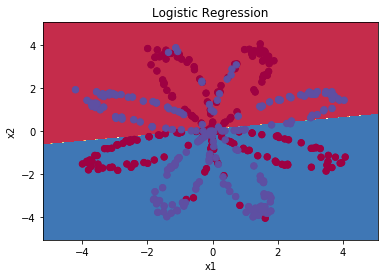

In [60]:
plt.scatter(X[0, :], X[1, :], c=Y, s=40, cmap=plt.cm.Spectral)
plt.show()

In [65]:
X_shape = X.shape
Y_shape = Y.shape
m = X_shape[1]
print 'Shape of X = ', X_shape
print 'Shape of Y = ', Y_shape
print 'Number of training examples = ', m

Shape of X =  (2, 400)
Shape of Y =  (1, 400)
Number of training examples =  400


In [66]:
clf = sklearn.linear_model.LogisticRegressionCV();
clf.fit(X.T, Y.T.ravel())

LogisticRegressionCV(Cs=10, class_weight=None, cv=None, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
           refit=True, scoring=None, solver='lbfgs', tol=0.0001, verbose=0)

In [67]:
plot_decision_boundary(lambda x: clf.predict(x), X, Y)
plt.title("Logistic Regression")

LR_predictions = clf.predict(X.T)
print 'Accuracy of logistic regression: %d ' % float((np.dot(Y, LR_predictions) + np.dot(1-Y, 1-LR_predictions)) / float(Y.size)*100), '% ', '(percentage of correctly labelled datapoints)'

Accuracy of logistic regression: 47  %  (percentage of correctly labelled datapoints)


In [68]:
def define_layers(X, Y):
    n_x = X.shape[0]
    n_h = 4
    n_y = Y.shape[0]
    return n_x, n_h, n_y

X_assess, Y_assess = layer_sizes_test_case()
n_x, n_h, n_y = define_layers(X_assess, Y_assess)
print 'Size of input layer is n_x =', n_x
print 'Size of hidden layer is n_h =', n_h
print 'Size of output layer is n_y =', n_y

Size of input layer is n_x = 5
Size of hidden layer is n_h = 4
Size of output layer is n_y = 2


In [69]:
def initialize_parameters(n_x, n_h, n_y):
    np.random.seed(2)    # we set up a seed so that your output matches ours although the initialization is random.
    
    W1 = np.random.randn(n_h, n_x) * 0.01
    b1 = np.zeros((n_h, 1))    # W1 is n_h by n_x, X is n_x by dim_x
    W2 = np.random.randn(n_y, n_h) * 0.01
    b2 = np.zeros((n_y, 1))
    
    params = {'W1': W1,
              'b1': b1,
              'W2': W2,
              'b2': b2}
    return params

n_x, n_h, n_y = initialize_parameters_test_case()
params = initialize_parameters(n_x, n_h, n_y)
print 'W1 = ' + str(params['W1'])
print 'b1 = ' + str(params['b1'])
print 'W2 = ' + str(params['W2'])
print 'b2 = ' + str(params['b2'])

W1 = [[-0.00416758 -0.00056267]
 [-0.02136196  0.01640271]
 [-0.01793436 -0.00841747]
 [ 0.00502881 -0.01245288]]
b1 = [[ 0.]
 [ 0.]
 [ 0.]
 [ 0.]]
W2 = [[-0.01057952 -0.00909008  0.00551454  0.02292208]]
b2 = [[ 0.]]


In [70]:
def forward_propagation(X, params):
    W1 = params['W1']
    b1 = params['b1']
    W2 = params['W2']
    b2 = params['b2']
    
    Z1 = np.dot(W1, X) + b1    # Z1 is n_h by dim_x
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2, A1) + b2    # Z2 n_y by dim_x
    #print 'Z2.shape should be n_y, dim_x =', Z2.shape
    A2 = sigmoid(Z2)
    
    assert(A2.shape[1] == X.shape[1])
    
    cache = {'Z1': Z1,
             'A1': A1,
             'Z2': Z2,
             'A2': A2}
    
    return A2, cache

X_assess, parameters = forward_propagation_test_case()
print 'X_assess.shape is n_x by dim_x =', X_assess.shape
A2, cache = forward_propagation(X_assess, parameters)
print 'mean(Z1) =', np.mean(cache['Z1']) , ' mean(A1) =', np.mean(cache['A1']), ' mean(Z2) =', np.mean(cache['Z2']), ' mean(A2) =', np.mean(cache['A2'])


X_assess.shape is n_x by dim_x = (2, 3)
mean(Z1) = -0.000499755777742  mean(A1) = -0.000496963353232  mean(Z2) = 0.000438187450959  mean(A2) = 0.500109546852


In [71]:
def compute_cost(A2, Y, params):
    m = Y.shape[1]
    cost = -1.0 / m * (np.dot(Y, np.log(A2).T) + np.dot(1-Y, np.log(1-A2).T)) # A2 is n_y by dim_x, Y is n_y by m
    return np.squeeze(cost)

A2, Y_assess, parameters = compute_cost_test_case()
print 'A2.shape =', A2.shape, 'Y_assess,shape =', Y_assess.shape
print 'cost = ' + str(compute_cost(A2, Y_assess, parameters))

A2.shape = (1, 3) Y_assess,shape = (1, 3)
cost = 0.692919893776


In [72]:
def backward_propagation(params, cache, X, Y):
    m = X.shape[1]
    W1 = params['W1']
    W2 = params['W2']
    A1 = cache['A1']
    A2 = cache['A2']
    
    dZ2 = A2 - Y
    dW2 = 1.0 / m * np.dot(dZ2, A1.T)
    db2 = 1.0 / m * np.sum(dZ2, axis=1, keepdims=True)
    derivative_Z1 = (1 - np.power(A1, 2))
    # dZ1 = np.dot(dW2.T, dZ2) * derivative_Z1    # BUG: mis-understanding of formular for logistics and NN
    dZ1 = np.dot(W2.T, dZ2) * derivative_Z1 
    # dW1 = 1.0 / m * np.dot(dZ1, A1.T)    # BUG: mis-understanding of formular for logistics and NN
    dW1 = 1.0 / m * np.dot(dZ1, X.T)
    db1 = 1.0 / m * np.sum(dZ1, axis=1, keepdims=True)
    
    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2}
    
    return grads

parameters, cache, X_assess, Y_assess = backward_propagation_test_case()

grads = backward_propagation(parameters, cache, X_assess, Y_assess)
print 'dW1 = '+ str(grads['dW1'])
print 'db1 = '+ str(grads['db1'])
print 'dW2 = '+ str(grads['dW2'])
print 'db2 = '+ str(grads['db2'])

dW1 = [[ 0.01018708 -0.00708701]
 [ 0.00873447 -0.0060768 ]
 [-0.00530847  0.00369379]
 [-0.02206365  0.01535126]]
db1 = [[-0.00069728]
 [-0.00060606]
 [ 0.000364  ]
 [ 0.00151207]]
dW2 = [[ 0.00363613  0.03153604  0.01162914 -0.01318316]]
db2 = [[ 0.06589489]]


In [73]:
def update_parameters(params, grads, learning_rate=0.02):
    W1 = params['W1']
    b1 = params['b1']
    W2 = params['W2']
    b2 = params['b2']
    
    dW1 = grads['dW1']
    db1 = grads['db1']
    dW2 = grads['dW2']
    db2 = grads['db2']
    
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    
    params = {'W1': W1,
              'b1': b1,
              'W2': W2,
              'b2': b2}
    
    return params

parameters, grads = update_parameters_test_case()
parameters = update_parameters(parameters, grads, learning_rate=1.2)

print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[-0.00643025  0.01936718]
 [-0.02410458  0.03978052]
 [-0.01653973 -0.02096177]
 [ 0.01046864 -0.05990141]]
b1 = [[ -1.02420756e-06]
 [  1.27373948e-05]
 [  8.32996807e-07]
 [ -3.20136836e-06]]
W2 = [[-0.01041081 -0.04463285  0.01758031  0.04747113]]
b2 = [[ 0.00010457]]


In [85]:
def nn_model(X, Y, n_h, iter_num=10000, learning_rate=1.2, print_cost=False):
    np.random.seed(3)
    n_x, _, n_y = define_layers(X, Y)
    
    params = initialize_parameters(n_x, n_h, n_y)
    
    for index in range(iter_num):
        A2, cache = forward_propagation(X, params)
        cost = compute_cost(A2, Y, params)
        grads = backward_propagation(params, cache, X, Y)
        params = update_parameters(params, grads, learning_rate=1.2)
        if print_cost and index % 1000 == 0:
            print ("Cost after iteration %i: %f" %(index, cost))
    return params

X_assess, Y_assess = nn_model_test_case()

parameters = nn_model(X_assess, Y_assess, 4, iter_num=10000, learning_rate=1.2, print_cost=False)
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


W1 = [[-4.18503197  5.33214315]
 [-7.52988635  1.24306559]
 [-4.19302427  5.32627154]
 [ 7.52984762 -1.24308746]]
b1 = [[ 2.32926944]
 [ 3.79460252]
 [ 2.33002498]
 [-3.79466751]]
W2 = [[-6033.83668723 -6008.12983227 -6033.10091631  6008.06624417]]
b2 = [[-52.66610924]]


In [78]:
def predict(params, X):
    A2, cache = forward_propagation(X, params)
    predictions = (A2 > 0.5)
    return predictions

parameters, X_assess = predict_test_case()

predictions = predict(parameters, X_assess)
print("predictions mean = " + str(np.mean(predictions)))

predictions mean = 0.666666666667


Cost after iteration 0: 0.693048
Cost after iteration 1000: 0.288083
Cost after iteration 2000: 0.254385
Cost after iteration 3000: 0.233864
Cost after iteration 4000: 0.226792
Cost after iteration 5000: 0.222644
Cost after iteration 6000: 0.219731
Cost after iteration 7000: 0.217504
Cost after iteration 8000: 0.219467
Cost after iteration 9000: 0.218561


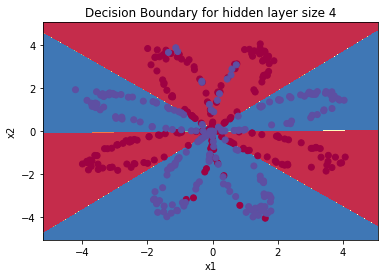

In [86]:
parameters = nn_model(X, Y, n_h = 4, iter_num = 10000, learning_rate=1.2, print_cost=True)
plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y)
plt.title("Decision Boundary for hidden layer size " + str(4))
plt.show()

In [88]:
predictions = predict(parameters, X)
print ('Accuracy: %d' % float((np.dot(Y,predictions.T) + np.dot(1-Y,1-predictions.T))/float(Y.size)*100) + '%')

Accuracy: 90%


Accuracy for 1 hidden units: 67.5 %
Accuracy for 2 hidden units: 67.25 %
Accuracy for 3 hidden units: 90.75 %
Accuracy for 4 hidden units: 90.5 %
Accuracy for 5 hidden units: 91.25 %
Accuracy for 10 hidden units: 90.25 %
Accuracy for 20 hidden units: 90.5 %


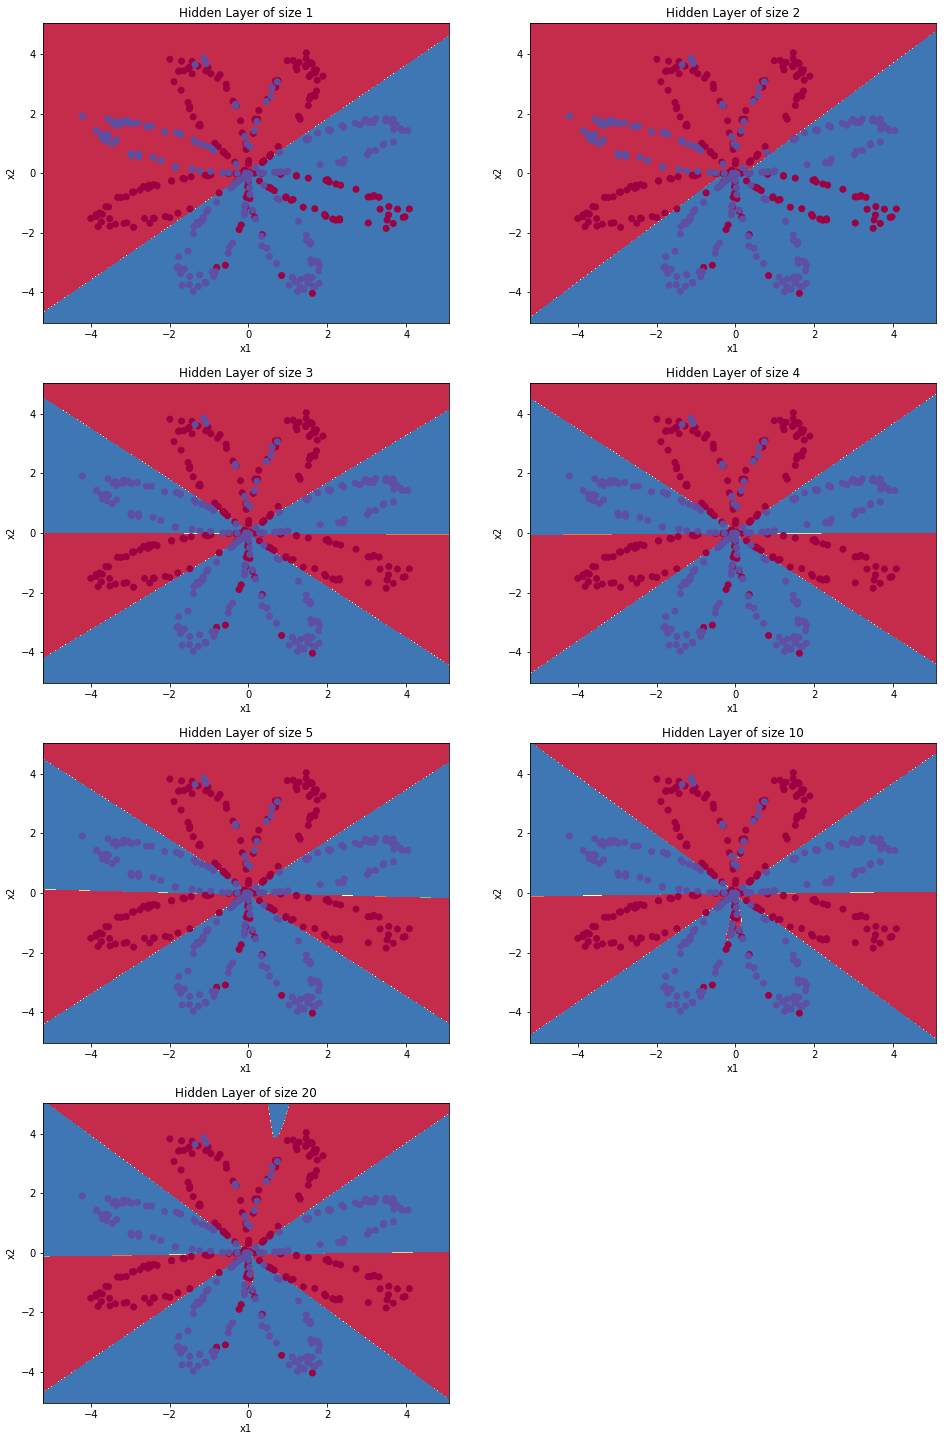

In [92]:
plt.figure(figsize=(16, 32))
hidden_layer_sizes = [1, 2, 3, 4, 5, 10, 20]
for i, n_h in enumerate(hidden_layer_sizes):
    plt.subplot(5, 2, i+1)
    plt.title('Hidden Layer of size %d' % n_h)
    params = nn_model(X, Y, n_h, iter_num = 5000)
    plot_decision_boundary(lambda x: predict(params, x.T), X, Y)
    predictions = predict(params, X)
    accuracy = float((np.dot(Y,predictions.T) + np.dot(1-Y,1-predictions.T))/float(Y.size)*100)
    print ("Accuracy for {} hidden units: {} %".format(n_h, accuracy))
plt.show()